In [184]:
import pandas as pd
import matplotlib as plt
import scipy
import sqlite3

# connect to SQLite database
conn = sqlite3.connect('snic_provincias.db')

# see some types
# query = "SELECT DISTINCT codigo_delito_snic_nombre AS Tipo FROM prov_stats LIMIT 10"

# df = pd.read_sql_query(query, conn)
# print(df)


In [185]:
# query the database with type wanted
query = """
    SELECT provincia_nombre AS Provincia, anio AS Año, codigo_delito_snic_nombre AS Tipo,
        cantidad_hechos AS Cantidad, tasa_hechos AS Tasa
    FROM prov_stats
    WHERE Año = 2022 AND Tipo = 'Homicidios dolosos'
    ORDER BY Tasa DESC
    """

df = pd.read_sql_query(query, conn)
print(df)

              Provincia   Año                Tipo  Cantidad       Tasa
0              Santa Fe  2022  Homicidios dolosos       384  10.696382
1                Chubut  2022  Homicidios dolosos        36   5.631212
2              Misiones  2022  Homicidios dolosos        70   5.432775
3               Neuquén  2022  Homicidios dolosos        36   5.288471
4               Formosa  2022  Homicidios dolosos        30   4.880382
5               Tucumán  2022  Homicidios dolosos        80   4.613296
6                 Chaco  2022  Homicidios dolosos        49   3.991086
7          Buenos Aires  2022  Homicidios dolosos       710   3.971863
8            Santa Cruz  2022  Homicidios dolosos        14   3.647477
9                 Salta  2022  Homicidios dolosos        53   3.631684
10              Mendoza  2022  Homicidios dolosos        68   3.349653
11  Santiago del Estero  2022  Homicidios dolosos        32   3.206114
12             San Luis  2022  Homicidios dolosos        16   3.071931
13    

### Estimates of Location: key ideas
- The basic metric for location is the mean, but it can be sensitive to extreme
values (outlier).
- Other metrics (median, trimmed mean) are less sensitive to outliers and unusual
distributions and hence are more robust.

In [186]:
# Intentional crime rate Mean
df['Tasa'].mean()

3.54925495

In [187]:
# Intentional crime rate Median
df['Tasa'].median()

3.1390226

In [188]:
# Intentional crime rate Trimmed Mean
# good idea to exclude the Santa Fe outlier
scipy.stats.trim_mean(df['Tasa'], 0.1)

3.3120062100000007

### Estimates of Variability: key ideas
- Variance and standard deviation are the most widespread and routinely reported
statistics of variability.
- Both are sensitive to outliers.
- More robust metrics include mean absolute deviation, median absolute deviation
from the median, and percentiles (quantiles).

In [189]:
# Intentional crime rate Standard Deviation
df['Tasa'].std()
# variance is the same squared

1.9687645835677894

In [190]:
# Intentional crime rate IQR
# it is not sensitive to the Santa Fe outlier so its smaller than STD
df['Tasa'].quantile(0.75) - df['Tasa'].quantile(0.25) 
# the MAD is calculated in R

1.8961043499999999

### Data distribution: key ideas

In [191]:
# Percentiles / quantiles
df['Tasa'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.582775
0.25    2.250534
0.50    3.139023
0.75    4.146638
0.95    5.601446
Name: Tasa, dtype: float64

Text(0, 0.5, 'Intentional crime rate')

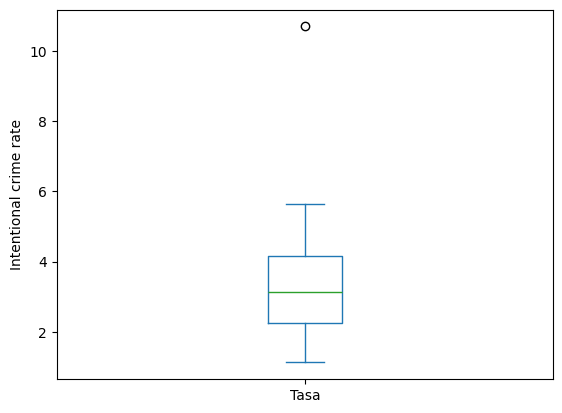

In [192]:
# Crime rate Boxplot
ax = (df['Tasa']).plot.box()
ax.set_ylabel('Intentional crime rate')

The _whiskers_ will not go beyond 1.5 times the IQR. The green line is the median, the top and bottom of the box are the .25 and .75 quantiles. The dot from upside is the Santa Fe outlier.

In [193]:
# Crime rate Frecuency table
pd.cut(df['Tasa'], 5).value_counts() # divide it into 5 equal size segments

Tasa
(1.119, 3.042]     11
(3.042, 4.956]      9
(4.956, 6.869]      3
(8.783, 10.696]     1
(6.869, 8.783]      0
Name: count, dtype: int64